# Compare clustering using finite mixture vs DP mixture of Gaussians

In [1]:
try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

from probml_utils.dp_mixgauss_utils import NormalInverseWishart, gmm_gibbs, dp_mixgauss_gibbs

import jax.numpy as jnp
from jax import random, vmap
from jax.scipy.linalg import sqrtm
import matplotlib.pyplot as plt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 181 kB/s 
     |████████████████████████████████| 272 kB 26.6 MB/s 
     |████████████████████████████████| 125 kB 59.5 MB/s 
     |████████████████████████████████| 72 kB 548 kB/s 
     |████████████████████████████████| 1.1 MB 55.4 MB/s 


In [4]:
# Silence WARNING:root:The use of `check_types` is deprecated and does not have any effect.
# https://github.com/tensorflow/probability/issues/1523
import logging
logger = logging.getLogger() 

class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()


logger.addFilter(CheckTypesFilter())

In [11]:
dim = 2
concentration = 1.0
num_of_clusters = 4
num_of_data = 300
num_of_samples = 1000

K = num_of_clusters

In [5]:
# Example 1
key = random.PRNGKey(0)
# Generating the true data
key, *subkeys = random.split(key, 4)
niw_params1 = dict(loc=jnp.zeros(dim), mean_precision=0.02, df=dim + 5, scale=jnp.eye(dim))
niw1 = NormalInverseWishart(**niw_params1)
cluster_weights = random.dirichlet(subkeys[1], concentration * jnp.ones(num_of_clusters))
# cluster assignment of each datum
cluster_indices = random.categorical(subkeys[2], jnp.log(cluster_weights), shape=(num_of_data,))
cluster_params = niw1.sample(seed=subkeys[0], sample_shape=(num_of_clusters,))
cluster_covs = cluster_params["Sigma"]
cluster_means = cluster_params["mu"]
# data
mean_per_datum = cluster_means[cluster_indices]
cov_per_datum = cluster_covs[cluster_indices]
key, *subkeys = random.split(key, num_of_data + 1)
data1 = vmap(random.multivariate_normal, in_axes=(0, 0, 0))(jnp.array(subkeys), mean_per_datum, cov_per_datum)
# Clustering
gmm_samples1 = gmm_gibbs(key, num_of_samples, data1, concentration, num_of_clusters, niw_params1)
dp_samples1 = dp_mixgauss_gibbs(key, num_of_samples, data1, concentration, niw_params1)
example1 = (gmm_samples1[-1], dp_samples1[-1])

In [28]:
def plot_results(data, samples, ttl, fname):
  cmap = plt.get_cmap("tab10")
  fig, ax = plt.subplots()
  plt.setp(ax, xticks=[], yticks=[])
  clusters = jnp.unique(samples)
  for k in clusters:
      sub_samples = data[samples == k, :]
      ax.scatter(sub_samples[:, 0], sub_samples[:, 1], color=cmap(k))
  plt.title(ttl)
  pml.savefig(fname)
    
pml.latexify(fig_height=1.5)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


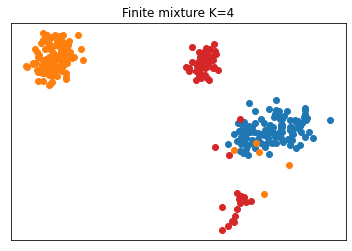

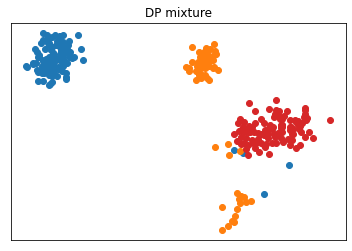

In [29]:

plot_results(data1, gmm_samples1[-1], 'Finite mixture K={}'.format(K), 'dp_mixgauss_cluster1_K4');
plot_results(data1, dp_samples1[-1], 'DP mixture', 'dp_mixgauss_cluster1_K*');

In [6]:
# Example 2
key = random.PRNGKey(1)
# Generating the true data
key, *subkeys = random.split(key, 4)
niw_params2 = dict(loc=jnp.zeros(dim), mean_precision=0.05, df=dim + 5, scale=jnp.eye(dim))
niw2 = NormalInverseWishart(**niw_params2)
cluster_weights = random.dirichlet(subkeys[1], concentration * jnp.ones(num_of_clusters))
# cluster assignment of each datum
cluster_indices = random.categorical(subkeys[2], jnp.log(cluster_weights), shape=(num_of_data,))
cluster_params = niw2.sample(seed=subkeys[0], sample_shape=(num_of_clusters,))
cluster_covs = cluster_params["Sigma"]
cluster_means = cluster_params["mu"]
# data
mean_per_datum = cluster_means[cluster_indices]
cov_per_datum = cluster_covs[cluster_indices]
key, *subkeys = random.split(key, num_of_data + 1)
data2 = vmap(random.multivariate_normal, in_axes=(0, 0, 0))(jnp.array(subkeys), mean_per_datum, cov_per_datum)
# Clustering
gmm_samples2 = gmm_gibbs(key, num_of_samples, data2, concentration, num_of_clusters, niw_params2)
dp_samples2 = dp_mixgauss_gibbs(key, num_of_samples, data2, concentration, niw_params2)
example2 = (gmm_samples2[-1], dp_samples2[-1])

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


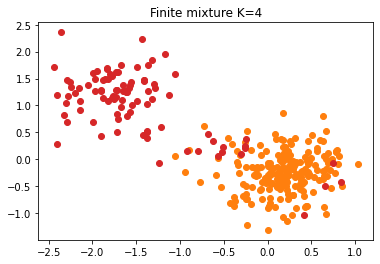

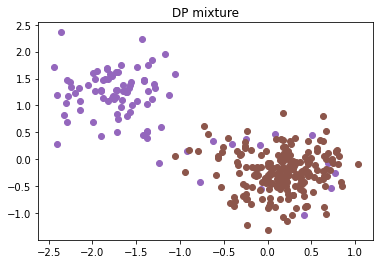

In [24]:

plot_results(data2, gmm_samples2[-1], 'Finite mixture K={}'.format(K), 'dp_mixgauss_cluster2_K4');
plot_results(data2, dp_samples2[-1], 'DP mixture', 'dp_mixgauss_cluster2_K*');

In [7]:
# Example 3
key = random.PRNGKey(2)
# Generating the true data
key, *subkeys = random.split(key, 4)
niw_params3 = dict(loc=jnp.zeros(dim), mean_precision=0.5, df=dim + 5, scale=jnp.eye(dim))
niw3 = NormalInverseWishart(**niw_params3)
cluster_weights = random.dirichlet(subkeys[1], concentration * jnp.ones(num_of_clusters))
# cluster assignment of each datum
cluster_indices = random.categorical(subkeys[2], jnp.log(cluster_weights), shape=(num_of_data,))
cluster_params = niw3.sample(seed=subkeys[0], sample_shape=(num_of_clusters,))
cluster_covs = cluster_params["Sigma"]
cluster_means = cluster_params["mu"]
# data
mean_per_datum = cluster_means[cluster_indices]
cov_per_datum = cluster_covs[cluster_indices]
key, *subkeys = random.split(key, num_of_data + 1)
data3 = vmap(random.multivariate_normal, in_axes=(0, 0, 0))(jnp.array(subkeys), mean_per_datum, cov_per_datum)
# Clustering
gmm_samples3 = gmm_gibbs(key, num_of_samples, data3, concentration, num_of_clusters, niw_params3)
dp_samples3 = dp_mixgauss_gibbs(key, num_of_samples, data3, concentration, niw_params3)
example3 = (gmm_samples3[-1], dp_samples3[-1])

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


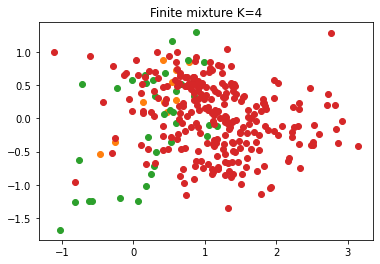

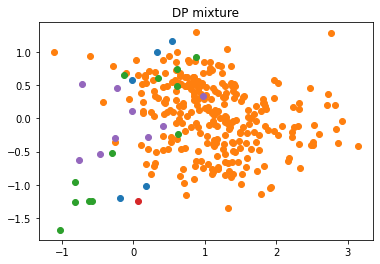

In [25]:

plot_results(data3, gmm_samples3[-1], 'Finite mixture K={}'.format(K), 'dp_mixgauss_cluster3_K4');
plot_results(data3, dp_samples3[-1], 'DP mixture', 'dp_mixgauss_cluster3_K*');

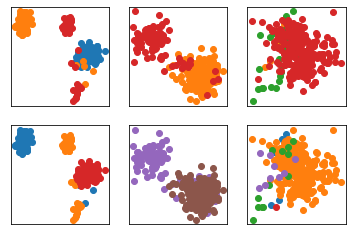

In [8]:
# Plotting
cmap = plt.get_cmap("tab10")
data = (data1, data2, data3)
examples = (example1, example2, example3)
# Different rows represents different clustering results;
# different column represents different examples.
fig, axes = plt.subplots(2, 3)
plt.setp(axes, xticks=[], yticks=[])
for i in range(3):
    for j in range(2):
        samples = examples[i][j]
        clusters = jnp.unique(samples)
        for k in clusters:
            sub_samples = data[i][samples == k, :]
            axes[j, i].scatter(sub_samples[:, 0], sub_samples[:, 1], color=cmap(k))
plt.show()